In [ ]:
# https://www.tensorflow.org/tutorials/generative/style_transfer?hl=ko

# https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 

In [5]:
# VGG19 의 모델을 가져왔다. 

network = tf.keras.applications.VGG19(include_top= False, weights = "imagenet")

80142336/80134624 [==============================] - 26s 0us/step


In [6]:
# summary로 구성을 확인했다.
network.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [7]:
len(network.layers)

22

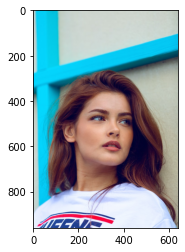

In [11]:
content_image = tf.keras.preprocessing.image.load_img("./images/g2.jpg")
plt.imshow(content_image)

In [12]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [14]:
# 연산하기 쉽게 array 형으로 바꿔준다. 
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [15]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (960, 640, 3), 0.0, 255.0)

In [16]:
# 정규화 
content_image = content_image / 255 

In [17]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (960, 640, 3), 0.0, 1.0)

In [18]:
content_image

array([[[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.76862746, 0.79607844, 0.7647059 ],
        ...,
        [0.7294118 , 0.76862746, 0.7254902 ],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.72156864, 0.7607843 , 0.7176471 ]],

       [[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.76862746, 0.79607844, 0.7647059 ],
        ...,
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864]],

       [[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.7607843 , 0.8       , 0.7647059 ],
        ...,
        [0.72156864, 0.7607843 , 0.7176471 ],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864]],

       ...,

       [[0.91764706, 0.9490196 , 1.        ],
        [0.91764706, 0.9490196 , 1.        ],
        [0.91764706, 0

In [21]:
# 텐서플로우 형태 중 배치(batch)를 넣어줘서 축을 하나 더 넣어주는 것이다.
content_image = content_image[tf.newaxis, :]
content_image.shape

(1, 1, 1, 960, 640, 3)